# Customer leave

Customers began to leave Beta-Bank. Every month. A little, but noticeable. Banking marketers figured it was cheaper to keep current customers than to attract new ones.

It is necessary to predict whether the client will leave the bank in the near future or not. We are provided with historical data on customer behavior and termination of agreements with the bank.


Data Source: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Project Description

<b> Forecasting the leave of a Beta-Bank client.</b>

<b> Research description: </b>
Identify the model that most accurately predicts customer abandonment.

<b>Research purpose:</b>
Build machine learning models, validate the parameters, test the prediction with the f1 metric and find the best option, improve the result by balancing the initial data.

<b>Research objectives:</b>
1. Examine <a href = '#data'>input data</a>,
2. <a href = '#sep'>Split data </a> into training, validation and test sets,
3. Explore <a href = '#disbal'>balance</a> of classes,
4. Train models without class balancing on:
- <a href='#dtc'>Decision Tree Classifier</a>,
- <a href='#rfc'>Random Forest Classifier</a>,
- <a href = '#lr'> Logistic Regression </a>,
5. Balance classes with:
- <a href='#class_weight'>Class weights</a>,
- <a href = '#upsample'> Upsample </a>,
- <a href = '#downsample'> Downsample </a>
6. Test data against <a href = '#test'>test set</a>.
<b> Data: </b>
Features:
- RowNumber - row index in the data
- CustomerId — unique customer identifier
- Surname - surname
- CreditScore - credit rating
- Geography - country of residence
- Gender - gender
- Age - age
- Tenure - how many years a person has been a client of the bank
- Balance - account balance
- NumOfProducts - the number of bank products used by the client
- HasCrCard - the presence of a credit card
- IsActiveMember - client activity
- EstimatedSalary - estimated salary
Target:
- Exited — the fact that the client has left

<a id = 'data'></a>
## Data Preparation

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import time

from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix, accuracy_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier

In [2]:
data = pd.read_csv('/datasets/Churn.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Let's process the data by applying lower case.

In [4]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [5]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
# перевод в нижний регистр
data.columns = data.columns.str.lower()

In [7]:
# переименование столбцов
data.rename(columns = {'rownumber' : 'row_number', 'customerid' : 'customer_id', 'creditscore' : 'credit_score', 
                      'numofproducts' : 'num_of_products', 'hascrcard' : 'has_cr_card', 'isactivemember' : 'is_active_member',
                      'estimatedsalary' : 'estimated_salary'}, inplace = True)

In [8]:
data.head()

,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [9]:
# проверка пропущенных значений
data.isna().sum()

row_number            0
customer_id           0
surname               0
credit_score          0
geography             0
gender                0
age                   0
tenure              909
balance               0
num_of_products       0
has_cr_card           0
is_active_member      0
estimated_salary      0
exited                0
dtype: int64

Filling in empty values in a 'tenure' feature by median values grouped by 'balance'.

In [10]:
data['tenure'] = data.fillna(data.groupby('tenure')['balance'].transform('median'))

In [11]:
data.isna().sum()

row_number          0
customer_id         0
surname             0
credit_score        0
geography           0
gender              0
age                 0
tenure              0
balance             0
num_of_products     0
has_cr_card         0
is_active_member    0
estimated_salary    0
exited              0
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   row_number        10000 non-null  int64  
 1   customer_id       10000 non-null  int64  
 2   surname           10000 non-null  object 
 3   credit_score      10000 non-null  int64  
 4   geography         10000 non-null  object 
 5   gender            10000 non-null  object 
 6   age               10000 non-null  int64  
 7   tenure            10000 non-null  object 
 8   balance           10000 non-null  float64
 9   num_of_products   10000 non-null  int64  
 10  has_cr_card       10000 non-null  int64  
 11  is_active_member  10000 non-null  int64  
 12  estimated_salary  10000 non-null  float64
 13  exited            10000 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 1.1+ MB


In [13]:
# признак geography включает 3 страны:
data['geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: geography, dtype: int64

In [14]:
data['exited'].value_counts()

0    7963
1    2037
Name: exited, dtype: int64

In [15]:
data.head()

,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,1,15634602,Hargrave,619,France,Female,42,1,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,2,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,3,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,4,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,5,125510.82,1,1,1,79084.10,0


The dataset contains the following categorical features: geography (only 3 countries), gender (2 genders). We need to convert them to numerical using the One-Hot Encoding method:

<a id = 'sep'></a>
### Working on sets

In the case of the gender feature, we can remove the first column since the dummy features are dependent on each other.
For the geography feature, we can split into 3 dummy features: geography_France/Germany/Spain with the first column removed.

In [16]:
# разделим признак gender, с удалением первого столбца
data['gender'] = pd.get_dummies(data['gender'], drop_first = True)
# разделение на 3 фиктивных признака
data['geography'] = pd.get_dummies(data['geography'], drop_first = True)
#ohe = pd.get_dummies(data = data, columns = ['geography'])

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   row_number        10000 non-null  int64  
 1   customer_id       10000 non-null  int64  
 2   surname           10000 non-null  object 
 3   credit_score      10000 non-null  int64  
 4   geography         10000 non-null  uint8  
 5   gender            10000 non-null  uint8  
 6   age               10000 non-null  int64  
 7   tenure            10000 non-null  object 
 8   balance           10000 non-null  float64
 9   num_of_products   10000 non-null  int64  
 10  has_cr_card       10000 non-null  int64  
 11  is_active_member  10000 non-null  int64  
 12  estimated_salary  10000 non-null  float64
 13  exited            10000 non-null  int64  
dtypes: float64(2), int64(8), object(2), uint8(2)
memory usage: 957.2+ KB


The line index, client ID, and last name features do not affect the client's exit prediction, so we remove them.
The target feature is the fact that the client leaves. The remaining columns fall into the features category.

In [18]:
features = data.drop(['exited', 'surname', 'row_number', 'customer_id'], axis = 1)
target = data['exited']

In [19]:
# разделение на обучающую и тестовую выборки (20%)
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size = 0.2,
                                                                           random_state = 1)

In [21]:
numeric = ['credit_score', 'age', 'tenure', 'balance', 'num_of_products', 'estimated_salary']

scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

/tmp/ipykernel_48/4263246567.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_train[numeric] = scaler.transform(features_train[numeric])
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/tmp/ipykernel_48/4263246567.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

Data preparation in several stages:
1. Data conversion,
2. Filling in the gaps that make up 10% of the total dataset: the duration of the client period, with the median value of the client's balance,
3. Converting categorical features (gender and geography) into numerical ones using One-Hot Encoding and bypassing the dummy trap,
4. Separation of features into training and target,
5. Dividing the sample into training and testing (note - we omit the validation one in connection with the use of Grid Search), with the separation of unnecessary features for forecasting (row_number, customer_id, surname),
6. Data scaling by numerical features to eliminate the importance of features.

<a id = 'disbal'></a>
## Problem research

We explore how balanced the dataset and data with the target feature are.

In [22]:
data['exited'].value_counts(normalize = True)

0    0.7963
1    0.2037
Name: exited, dtype: float64

The fact that a client leaves is only 20% of the total sample. Data is unbalanced:

Text(0.5, 1.0, 'Факт ухода клиента')

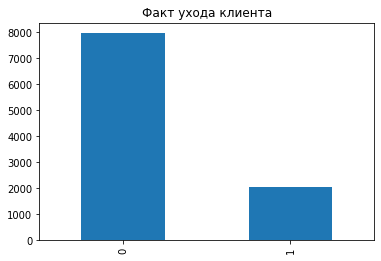

In [23]:
data['exited'].value_counts().plot(kind = 'bar')
plt.title('Client leaving fact')

At the initial stage, we will conduct a study on an unbalanced sample on 3 models: Decision Tree, Random Forest and Logistic Regression.
In order to find the optimal parameters, we apply the GridSearch algorithm.

In [24]:
def grid_f1(new_model, params):
    grid_model = GridSearchCV(new_model, params, scoring = 'f1')
    grid_model.fit(features_train, target_train)
    
    display(f'Value of F1-metrics: {grid_model.best_score_}')
    display(f'Best parameters: {grid_model.best_params_}')

In [25]:
def auc_roc(model):
    model.fit(features_train, target_train)
    probabilities_test = model.predict_proba(features_test)
    probabilities_one_test = probabilities_test[:, 1]
    display(f'Value of AUC-ROC metrics: {roc_auc_score(target_test, probabilities_one_test)}')

<a id = 'dtc'></a>
### Testing model Decision Tree Classifier

In [26]:
%%time

# перебор параметров
parameters_dtc = {
    'random_state' : [1],
    'max_depth' : range(1, 20),
    'min_samples_split' : range(2, 5),
    'min_samples_leaf' : range(1, 4) 
}


grid_f1(DecisionTreeClassifier(random_state = 1), parameters_dtc)

'Значение F1-меры: 0.5878803012795543'

"Лучшие параметры: {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 4, 'random_state': 1}"

CPU times: user 29.4 s, sys: 0 ns, total: 29.4 s
Wall time: 31 s


In [27]:
auc_roc(DecisionTreeClassifier(random_state = 1, max_depth = 7, min_samples_leaf = 1, min_samples_split = 4))

'Значение AUC-ROC-меры: 0.8459579643495116'

The Decision Tree Classifier model has a close but still insufficient result, let's try the Random Forest model.

<a id = 'rfc'></a>
### Testing model Random Forest Classifier

In [28]:
%%time

parameters_rfc = {
    'random_state' : [1],
    'n_estimators' : [50, 150, 20],
    'max_depth' : range(1, 20), 
}


grid_f1(RandomForestClassifier(random_state = 1), parameters_rfc)

'Значение F1-меры: 0.5787579833333959'

"Лучшие параметры: {'max_depth': 14, 'n_estimators': 50, 'random_state': 1}"

CPU times: user 2min 43s, sys: 694 ms, total: 2min 44s
Wall time: 2min 47s


In [29]:
auc_roc(RandomForestClassifier(random_state = 1, max_depth = 14, n_estimators = 50))

'Значение AUC-ROC-меры: 0.8590186613963742'

The Random Forest Classifier model also has a close but insufficient value. Let's test the Logistic Regression model.

<a id = 'lr'></a>
### Testing model Logistic Regression

In [30]:
%%time

parameters_lr = {
    'random_state' : [1],
    'max_iter' : [100, 2000, 100],
    'solver' : ['lbfgs', 'liblinear']
}


grid_f1(LogisticRegression(random_state = 1), parameters_lr)

'Значение F1-меры: 0.2974813299918403'

"Лучшие параметры: {'max_iter': 100, 'random_state': 1, 'solver': 'lbfgs'}"

CPU times: user 6.59 s, sys: 6.65 s, total: 13.2 s
Wall time: 13.2 s


In [31]:
auc_roc(LogisticRegression(random_state = 1, max_iter = 100, solver = 'lbfgs'))

'Значение AUC-ROC-меры: 0.7755630724791912'

The extremely low value of the f1 metric in Logistic Regression, one of the possible reasons remains the imbalance of the data.

## Solving imbalance problem

In order to solve the imbalance problem, we use 3 methods: Class weighting, Upsampling and Downsampling.

<a id = 'class_weight'></a>
### Class weight

In order to add significance to a rare class (1), we specify weight balancing: class_weight = balanced and re-find the optimal hyperparameters using the Grid Search method.

#### Decision Tree Classifier

In [32]:
%%time

# перебор параметров
parameters_dtc = {
    'random_state' : [1],
    'max_depth' : range(1, 20),
    'min_samples_split' : range(2, 5),
    'min_samples_leaf' : range(1, 4), 
    'class_weight' : ['balanced']
}


grid_f1(DecisionTreeClassifier(random_state = 1), parameters_dtc)

'Значение F1-меры: 0.5736549504968312'

"Лучшие параметры: {'class_weight': 'balanced', 'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 2, 'random_state': 1}"

CPU times: user 30.8 s, sys: 2.88 ms, total: 30.8 s
Wall time: 31.1 s


In [33]:
auc_roc(DecisionTreeClassifier(random_state = 1, max_depth = 7, min_samples_leaf = 1, min_samples_split = 4, class_weight = 'balanced'))

'Значение AUC-ROC-меры: 0.8380996541370529'

#### Random Forest Classifier

In [34]:
%%time

parameters_rfc = {
    'random_state' : [1],
    'n_estimators' : [50, 150, 20],
    'max_depth' : range(1, 20),
    'class_weight' : ['balanced']
}


grid_f1(RandomForestClassifier(random_state = 1), parameters_rfc)

'Значение F1-меры: 0.6182965205063481'

"Лучшие параметры: {'class_weight': 'balanced', 'max_depth': 10, 'n_estimators': 150, 'random_state': 1}"

CPU times: user 2min 44s, sys: 593 ms, total: 2min 45s
Wall time: 2min 49s


In [35]:
auc_roc(RandomForestClassifier(random_state = 1, max_depth = 10, n_estimators = 150, class_weight = 'balanced'))

'Значение AUC-ROC-меры: 0.8753084261335562'

#### Logistic Regression

In [36]:
%%time

parameters_lr = {
    'random_state' : [1],
    'max_iter' : [100, 2000, 100],
    'solver' : ['lbfgs', 'liblinear'],
    'class_weight' : ['balanced']
}


grid_f1(LogisticRegression(random_state = 1), parameters_lr)

'Значение F1-меры: 0.48689691888282854'

"Лучшие параметры: {'class_weight': 'balanced', 'max_iter': 100, 'random_state': 1, 'solver': 'liblinear'}"

CPU times: user 6.33 s, sys: 5.84 s, total: 12.2 s
Wall time: 12.1 s


In [37]:
auc_roc(LogisticRegression(random_state = 1, max_iter = 100, solver = 'liblinear', class_weight = 'balanced'))

'Значение AUC-ROC-меры: 0.7812337045342252'

| Model | f1 before class weight | f1 after class weight  |
| --- | --- | --- |
| Decision Tree Classifier | 0.587 | 0.574 |
| Random Forest Classifier | 0.579 | 0.618 |
| Logistic Regression | 0.297 | 0.487 |

Adding a weight is successful only for a Random Forest that has crossed the f1 metric threshold. Weight balancing helped the Logistic Regression model but worsened the results of the Decision Tree.

<a id = 'upsample'></a>
### Upsampling

We increase the amount of data of the smaller class (1) by 4 times in order to balance the sample and bring the number of values of classes 0 and 1 to the same value.

In [38]:
# функция разделяет признаки по классам, "удлиняет" меньший класс в repeat раз и создает новую выборку с перемешанными данными
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=1)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)
display(features_upsampled.shape, target_upsampled.shape)

(12866, 10)

(12866,)

In [39]:
def grid_f1_sampled(new_model, params, features, target):
    grid_model = GridSearchCV(new_model, params, scoring = 'f1')
    grid_model.fit(features, target)
    
    display(f'Значение F1-меры: {grid_model.best_score_}')
    display(f'Лучшие параметры: {grid_model.best_params_}')

In [40]:
def auc_roc_sampl(model, features, target):
    model.fit(features, target)
    probabilities_test = model.predict_proba(features_test)
    probabilities_one_test = probabilities_test[:, 1]
    display(f'Значение AUC-ROC-меры: {roc_auc_score(target_test, probabilities_one_test)}')

#### Decision Tree Classifier

In [41]:
%%time

# перебор параметров
parameters_dtc = {
    'random_state' : [1],
    'max_depth' : range(1, 20),
    'min_samples_split' : range(2, 5),
    'min_samples_leaf' : range(1, 4)
}


grid_f1_sampled(DecisionTreeClassifier(random_state = 1), parameters_dtc, features_upsampled, target_upsampled)

'Значение F1-меры: 0.9246335084664647'

"Лучшие параметры: {'max_depth': 19, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 1}"

CPU times: user 39.1 s, sys: 36.5 ms, total: 39.1 s
Wall time: 39.2 s


In [42]:
auc_roc_sampl(DecisionTreeClassifier(random_state = 1, max_depth = 19, min_samples_leaf = 1, min_samples_split = 2 ), features_upsampled, target_upsampled )

'Значение AUC-ROC-меры: 0.7048709665159059'

#### Random Forest Classifier

In [43]:
%%time

parameters_rfc = {
    'random_state' : [1],
    'n_estimators' : [50, 150, 20],
    'max_depth' : range(1, 20)
}


grid_f1_sampled(RandomForestClassifier(random_state = 1), parameters_rfc, features_upsampled, target_upsampled)

'Значение F1-меры: 0.9553273498841225'

"Лучшие параметры: {'max_depth': 19, 'n_estimators': 150, 'random_state': 1}"

CPU times: user 3min 54s, sys: 577 ms, total: 3min 54s
Wall time: 3min 55s


In [44]:
auc_roc_sampl(RandomForestClassifier(random_state = 1, max_depth = 19, n_estimators = 150), features_upsampled, target_upsampled)

'Значение AUC-ROC-меры: 0.8621033028011098'

#### Logistic Regression

In [45]:
%%time

parameters_lr = {
    'random_state' : [1],
    'max_iter' : [100, 2000, 100],
    'solver' : ['lbfgs', 'liblinear']
}


grid_f1_sampled(LogisticRegression(random_state = 1), parameters_lr, features_upsampled, target_upsampled)

'Значение F1-меры: 0.7023331355859849'

"Лучшие параметры: {'max_iter': 100, 'random_state': 1, 'solver': 'liblinear'}"

CPU times: user 6.96 s, sys: 6.01 s, total: 13 s
Wall time: 12.9 s


In [46]:
auc_roc_sampl(LogisticRegression(random_state = 1, max_iter = 100, solver = 'liblinear'), features_upsampled, target_upsampled)

'Значение AUC-ROC-меры: 0.7812185017673217'

| Model | f1 before upsampling | f1 after upsampling  |
| --- | --- | --- |
| Decision Tree Classifier | 0.587 | 0.925 |
| Random Forest Classifier | 0.579 | 0.955 |
| Logistic Regression | 0.297 | 0.70 |

All models have improved their values. Models trained almost perfectly! Random Forest has the best value.

<a id = 'downsample'></a>
### Downsampling

An alternative solution is to reduce the larger sample (class 0) to balance the values. In our case, we will leave 0.25 part of values.

In [57]:
# функция разделяет признаки по классам, "урезает" больший класс в fraction раз и создает новую выборку с перемешанными данными
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=1)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=1)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=1)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)
display(features_downsampled.shape, target_downsampled.shape)

(3216, 10)

(3216,)

#### Decision Tree Classifier

In [48]:
%%time

# перебор параметров
parameters_dtc = {
    'random_state' : [1],
    'max_depth' : range(1, 20),
    'min_samples_split' : range(2, 5),
    'min_samples_leaf' : range(1, 4)
}


grid_f1_sampled(DecisionTreeClassifier(random_state=1), parameters_dtc, features_downsampled, target_downsampled)

'Значение F1-меры: 0.759353581021845'

"Лучшие параметры: {'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 2, 'random_state': 1}"

CPU times: user 13.5 s, sys: 962 µs, total: 13.5 s
Wall time: 13.6 s


In [49]:
auc_roc_sampl(DecisionTreeClassifier(random_state=1, max_depth=6, min_samples_leaf=3, min_samples_split=2), features_downsampled, target_downsampled )

'Значение AUC-ROC-меры: 0.8354938998897798'

#### Random Forest Classifier

In [50]:
%%time

parameters_rfc = {
    'random_state' : [1],
    'n_estimators' : [50, 150, 20],
    'max_depth' : range(1, 20)
}


grid_f1_sampled(RandomForestClassifier(random_state = 1), parameters_rfc, features_downsampled, target_downsampled)

'Значение F1-меры: 0.7732080128197201'

"Лучшие параметры: {'max_depth': 8, 'n_estimators': 50, 'random_state': 1}"

CPU times: user 1min 14s, sys: 290 ms, total: 1min 14s
Wall time: 1min 15s


In [51]:
auc_roc_sampl(RandomForestClassifier(random_state = 1, max_depth = 8, n_estimators = 50), features_downsampled, target_downsampled)

'Значение AUC-ROC-меры: 0.8708038463000267'

#### Logistic Regression

In [52]:
%%time

parameters_lr = {
    'random_state' : [1],
    'max_iter' : [100, 2000, 100],
    'solver' : ['lbfgs', 'liblinear']
}


grid_f1_sampled(LogisticRegression(random_state = 1), parameters_lr, features_downsampled, target_downsampled)

'Значение F1-меры: 0.696111355836641'

"Лучшие параметры: {'max_iter': 100, 'random_state': 1, 'solver': 'lbfgs'}"

CPU times: user 1.55 s, sys: 1.83 s, total: 3.38 s
Wall time: 3.36 s


In [53]:
auc_roc_sampl(LogisticRegression(random_state=1, max_iter=100, solver='lbfgs'), features_downsampled, target_downsampled)

'Значение AUC-ROC-меры: 0.7776124054577933'

| Model | f1 before downsampling | f1 after downsampling  |
| --- | --- | --- |
| Decision Tree Classifier | 0.587 | 0.759 |
| Random Forest Classifier | 0.579 | 0.773 |
| Logistic Regression | 0.297 | 0.696 |

The result is worse than the method of increasing the smaller sample.

All models coped better with increasing the proportion of class [1] in the sample, the values showed that the model trained perfectly. It is possible that the model was retrained - overfitted, let's check the test set.

<a id = 'test'></a>
## Model testing

Let's check the Random Forest model on the test set, and also increase the smaller class of test data.

In [54]:
model = RandomForestClassifier(random_state=1, n_estimators=150,  max_depth=10, class_weight='balanced')

model.fit(features_train, target_train)
display('f1 на тестовой выборке: ', f1_score(target_test, model.predict(features_test)))

'f1 на тестовой выборке: '

0.6388557806912991

The model is also of higher quality than the random classifier!Модель так же имеет более высшее качество, чем случайный классификатор!

In [55]:
model = RandomForestClassifier(random_state = 1, n_estimators =  150,  max_depth = 19)

features_u_test, target_u_test = upsample(features_test, target_test, 4)

model.fit(features_train, target_train)
display('f1 на тестовой выборке: ', f1_score(target_test, model.predict(features_test)))


'f1 на тестовой выборке: '

0.6337579617834395

## Conclusion

We have carried out work on predicting the leave of the client of 'Beta-Bank'.

After examining the data and dividing it into training, validation and test sets, we assessed how well the model understands the data and does not retrain on unbalanced and balanced data:

1. Decision Tree Classifier - f1 metric indicator - 53% did not change with data balancing,
2. Random Forest Classifer - improved the metric from 60 to 63% with an increase in the sample,
3. Logistic Regression - improved the metric from 6 to 48% with the addition of weight.

We can <b>recommend</b> the <b>Random Forest Classifer</b> model for work, as it showed the highest accuracy and flexibility (reducing and increasing samples).